In [1]:
import numpy as np
import matlab as ml
import sys

sys.argv[1] = "/usr/local/python"

In [2]:
import config

In [3]:
import ObservationOperator as obop
import Model

In [4]:
import DataGeneration

In [5]:
DataGeneration.ObservationGeneration()

In [6]:
test1_obs1 = np.load(config.CFP['ObservationGeneration']['save_dir'])

In [9]:
test1_obs1.keys()

['random_seed', 'true_observation', 'output_observation']

In [10]:
test1_obs1['true_observation']

array([[1.50000000e+02, 8.04187625e-03, 1.48391625e+02, 6.58350000e+01,
        9.75710233e-03],
       [1.48053542e+02, 8.87302199e-03, 1.46316258e+02, 6.96204919e+01,
        1.07902197e-02],
       [1.45849231e+02, 9.74146243e-03, 1.43981897e+02, 7.33146529e+01,
        1.18641095e-02],
       ...,
       [4.76324336e+01, 1.09246386e-03, 4.73736731e+01, 5.10009530e+01,
        5.01317436e-06],
       [4.67621274e+01, 1.09075072e-03, 4.65084919e+01, 5.05682973e+01,
        5.00391087e-06],
       [4.56803494e+01, 1.11139400e-03, 4.54279195e+01, 5.00279018e+01,
        5.20377197e-06]])

In [5]:
DataGeneration.DataGeneration()

In [6]:
test1 = np.load(config.CFP['DataGeneration']['save_dir'])

In [7]:
test1.keys()

['xinit', 'tinit', 'random_seed', 'truestate']

In [10]:
test1['xinit']

array([-200.  ,    0.75])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

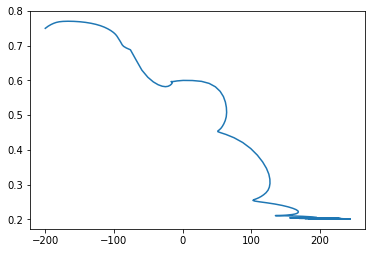

In [9]:
plt.plot(test1['truestate'][:,0],test1['truestate'][:,1])

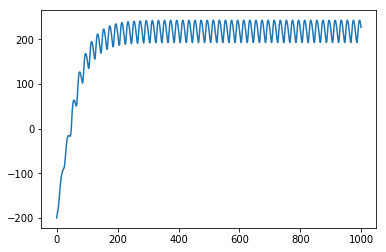

In [11]:
plt.plot(test1['truestate'][:,0])

In [10]:
np.savez(config.CFP['DataGeneration']['save_dir'],xinit=np.array([-200.,0.75]),tinit = 0.)

In [22]:
def TrueObsVer1(X):
    hc = 10 #TODO
    a =((0.2+X[:,1])/2+np.tanh(X[:,0]/(9.5*hc)) * (0.2-X[:,1])/2)
    Ci = 1-((0.8-(0.5*X[:,1]+.5*a))/0.6)
    Cp = (1 - a / X[:,1])
    Csat = np.maximum(0,Ci-Cp)
    m = a.shape[0]
    Rad = np.zeros([m,5])
    Rad[:,0] = np.absolute(X[:,0] * X[:,1])
    Rad[:,1] = X[:,1] - a
    Rad[:,2] = a * np.absolute(X[:,0])
    Rad[:,3] = (0.5+0.4 *np.tanh((-(X[:,0]-50)/10))) * ((X[:,0])+273.15)
    Rad[:,4] = Cp * Ci
    return Rad

In [20]:
def StupidObsVer1(X):
    hc = 10 #TODO
    a =((0.2+X[:,1])/2+np.tanh(X[:,0]/(9.5*hc)) * (0.2-X[:,1])/2)
    Ci = 1-((0.8-(0.5*X[:,1]+.5*a))/0.6)
    Cp = (1 - a / X[:,1])
    Csat = np.maximum(0,Ci-Cp)
    return Csat

In [27]:
def EW09default(x0,t0,t1,Fc):
    return eng.Mdefault(eng.transpose(ml.double(x0)),float(t0),float(t1),float(Fc))

In [5]:
x0 = np.array([200,0.75])
t0 = 0.
t1 = 1.
Fc = 10.
Model.EW09default(x0,t0,t1)

array([2.07589573e+02, 2.03636142e-01])

In [10]:
Model.EW09(x0,t0,t1)

matlab.double([[207.5895731935993,0.203636142256804]])

In [9]:
x0 = np.array(x0)

In [25]:
isinstance(x0,np.ndarray)

True

In [24]:
type(x0) is np.ndarray

True

In [21]:
X = np.array([[0.6555,0.9502],
    [0.1712,0.0344],
    [0.7060,0.4387],
    [0.0318,0.3816],
    [0.2769,0.7655],
    [0.0462,0.7952],
    [0.0971,0.1869],
    [0.8235,0.4898],
    [0.6948,0.4456],
    [0.3171,0.6463]])

In [23]:
Y = TrueObsVer1(X)

In [24]:
Y

array([[ 6.22856100e-01,  3.77688149e-01,  3.75281518e-01,
         2.46413613e+02,  3.71882201e-01],
       [ 5.88928000e-03, -8.29492142e-02,  2.00901855e-02,
         2.45978808e+02,  4.98842238e-01],
       [ 3.09722200e-01,  1.20236943e-01,  2.24834919e-01,
         2.46458946e+02,  8.15747170e-02],
       [ 1.21348800e-02,  9.08303941e-02,  9.24647347e-03,
         2.45853635e+02,  5.40256784e-02],
       [ 2.11966950e-01,  2.83574140e-01,  1.33445271e-01,
         2.46073714e+02,  2.61602503e-01],
       [ 3.67382400e-02,  2.97744728e-01,  2.29824336e-02,
         2.45866566e+02,  2.78528883e-01],
       [ 1.81479900e-02, -6.55669479e-03,  1.87846451e-02,
         2.45912272e+02,  5.74260553e-04],
       [ 4.03350300e-01,  1.46156023e-01,  2.82990815e-01,
         2.46564418e+02,  1.07782850e-01],
       [ 3.09602880e-01,  1.23698104e-01,  2.23657437e-01,
         2.46448892e+02,  8.50151254e-02],
       [ 2.04941730e-01,  2.23894848e-01,  1.33944674e-01,
         2.46109808e+02

In [25]:
Z = StupidObsVer1(X)
Z

array([0.53811042, 2.20443871, 0.02356033, 0.        , 0.33574519,
       0.36945192, 0.01871188, 0.06280392, 0.0286526 , 0.21082872])